# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)
data.index = data.index.to_period("Y")

In [2]:
# Preview the dataset
data

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6
1924,47.6
1928,47.8
1932,46.2
1936,46.5


Plot this time series data. 

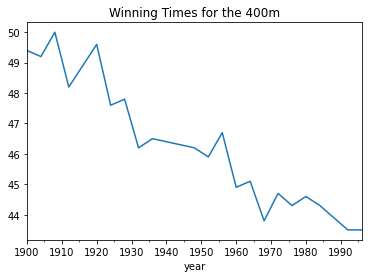

In [4]:
# Plot the time series
fig, ax = plt.subplots()
data.plot(ax=ax)
ax.get_legend().remove()
ax.set_title('Winning Times for the 400m');

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [9]:
# Difference the time series
data_diff = data.diff().dropna()
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

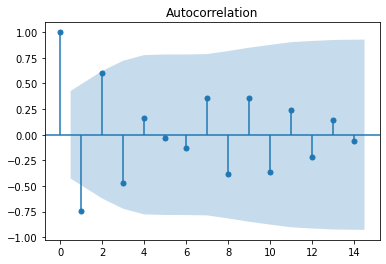

In [11]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_diff);

/Users/user/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


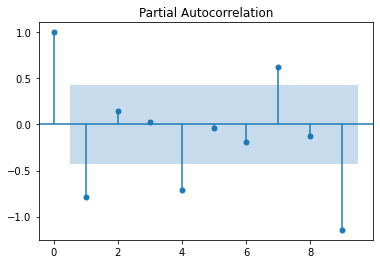

In [18]:
# Plot the PACF
plot_pacf(data_diff, lags=9);

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [14]:
from statsmodels.tsa.arima.model import ARIMA

In [15]:
model_1 = ARIMA(data_diff, order=(1,0,1))
results = model_1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -19.958
Date:                Thu, 02 Mar 2023   AIC                             47.916
Time:                        12:14:09   BIC                             52.094
Sample:                    12-31-1904   HQIC                            48.822
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2850      0.087     -3.266      0.001      -0.456      -0.114
ar.L1         -0.7707      0.177     -4.349      0.000      -1.118      -0.423
ma.L1          0.1172      0.285      0.412      0.680      -0.441       0.675
sigma2         0.3784      0.181      2.094      0.036       0.024       0.733
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.23
Prob(Q):                              0.90   Prob(JB):                         0.54
Heteroskedasticity (H):               0.31   Skew:                             0.23
Prob(H) (two-sided):                  0.14   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
model_2 = ARIMA(data_diff, order=(3,0,1))
results = model_2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 -18.561
Date:                Thu, 02 Mar 2023   AIC                             49.122
Time:                        12:15:09   BIC                             55.389
Sample:                    12-31-1904   HQIC                            50.482
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3001      0.059     -5.089      0.000      -0.416      -0.185
ar.L1          0.2073      0.373      0.556      0.578      -0.523       0.938
ar.L2          0.5046      0.317      1.590      0.112      -0.117       1.127
ar.L3         -0.2925      0.233     -1.254      0.210      -0.750       0.165
ma.L1         -0.9998    292.606     -0.003      0.997    -574.497     572.497
sigma2         0.2991     87.384      0.003      0.997    -170.971     171.569
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):                 1.07
Prob(Q):                              0.44   Prob(JB):                         0.59
Heteroskedasticity (H):               0.19   Skew:                             0.22
Prob(H) (two-sided):                  0.05   Kurtosis:                         1.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
model_3 = ARIMA(data_diff, order=(3,0,0))
results = model_3.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 -19.925
Date:                Thu, 02 Mar 2023   AIC                             49.851
Time:                        12:16:20   BIC                             55.073
Sample:                    12-31-1904   HQIC                            50.984
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2832      0.093     -3.032      0.002      -0.466      -0.100
ar.L1         -0.6361      0.207     -3.074      0.002      -1.042      -0.231
ar.L2          0.1282      0.307      0.418      0.676      -0.474       0.730
ar.L3          0.0260      0.291      0.090      0.929      -0.544       0.596
sigma2         0.3771      0.181      2.087      0.037       0.023       0.731
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.21
Prob(Q):                              0.90   Prob(JB):                         0.55
Heteroskedasticity (H):               0.32   Skew:                             0.21
Prob(H) (two-sided):                  0.15   Kurtosis:                         1.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
results.params

const    -0.283206
ar.L1    -0.636090
ar.L2     0.128248
ar.L3     0.026049
sigma2    0.377066
dtype: float64

In [23]:
model_4 = ARIMA(data_diff, order=(1,0,0))
results = model_4.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -20.054
Date:                Thu, 02 Mar 2023   AIC                             46.107
Time:                        12:19:43   BIC                             49.241
Sample:                    12-31-1904   HQIC                            46.787
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2885      0.081     -3.559      0.000      -0.447      -0.130
ar.L1         -0.7186      0.144     -5.005      0.000      -1.000      -0.437
sigma2         0.3819      0.180      2.121      0.034       0.029       0.735
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.19
Prob(Q):                              0.84   Prob(JB):                         0.55
Heteroskedasticity (H):               0.33   Skew:                             0.20
Prob(H) (two-sided):                  0.16   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## What is your final model? Why did you pick this model?

In [ ]:
# Your comments here
# None of these models seem that great. (The log-likelihood is negative for all three.)
# The autocorrelation clearly trails off.
# The partial autocorrelation, on the other hand, is ambiguous.
# Is the pacf cutting off or trailing off?
# None of the results seem much better than the others, so I'm not sure how to decide.

# Only the fourth model has statistically significant coefficients, so I will go with that one.

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 